## Projet Databeez : Profile data science
## Groupe VI 53 :
  #### DABGO Ariane
  #### MOUHICHIMIWA Issouf


## Credit Risk

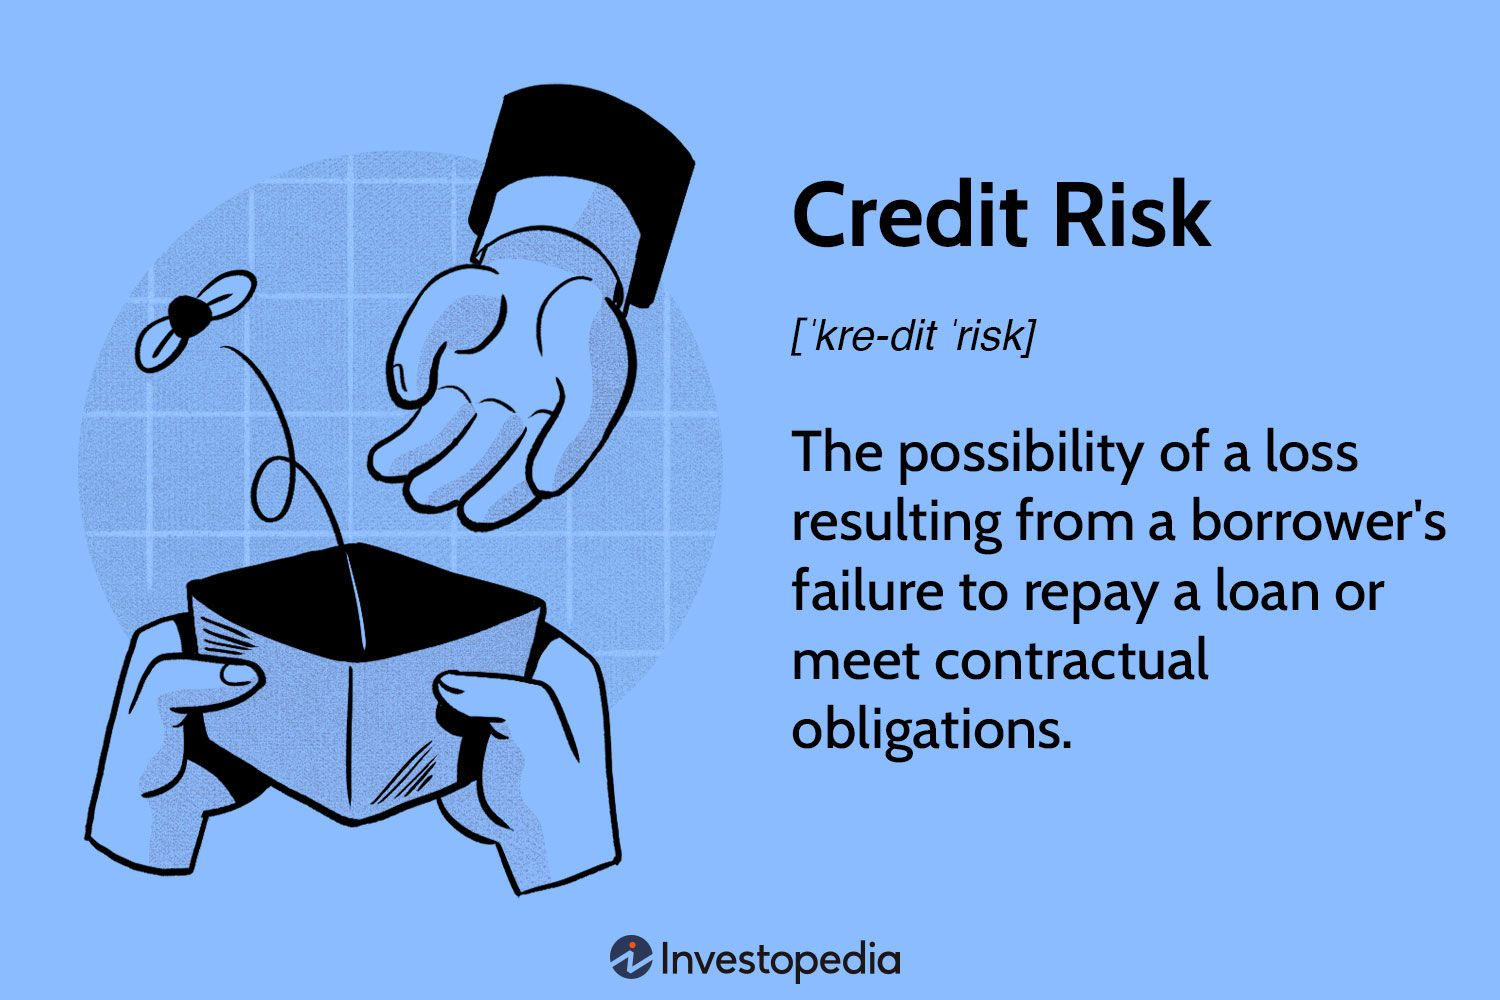

# Présentation du dataset

L'ensemble de données contient 1000 entrées représentant des personnes demandant un crédit bancaire. Chaque entrée décrie les caractéristiques liées à la personne ou à sa demande de crédit. Chaque personne est classée en deux catégories : bon risque ou mauvais risque de crédit, selon ces attributs.

1.  **Age** :(désigne l'âge du contractant)
2.   **Sex**:(désigne le sexe du contractant: masculin, féminin)
3.   **Job**: (numérique : 0 - non qualifié et non-résident, 1 - non qualifié et résident, 2 - qualifié, 3 - hautement qualifié)
4.   **Housing** : (texte : propriétaire, loué ou gratuit)
5.    **Saving accounts**:(désigne l'état du compte d'épargne - petit, modéré, assez riche, riche)
6.    **Checking account**:( désigne l'état du compte courant - petit, modéré, riche)
7.    **Credit amount**: (désigne le montant du crédit en DM - Deutsch Mark)
8.    **Duration**: (La durée pour le remboursement du crédit)
9.    **Purpose**: Le projet derrière de volonté de contracter le prêt.
10.     **Risk**: La target; indique si le risque de crédit est bon ou mauvais








Lien vers le dataset:
[https://www.kaggle.com/code/mathchi/credit-risk-evaluation](https://www.kaggle.com/code/mathchi/credit-risk-evaluation)

# Pipeline

**1. Import du dataset**

---

    Fichier CSV; import sous forme de dataframe pandas


**2. Analyse exploratoire**

---
    Information relative aux variables (type, nombre de lignes non null)
    Valeurs manquantes
    Taille du dataste
    Statistiques descriptive

**3. Visualisation**

---
    Visuel des variables numériques
    Visuel des variables Catégoriels


**4. Prétraitement**

---
    Gestion des valeurs manquantes(Simple Imputer)
    Encodage(LabelEncoding)
    Suppression des doublons
    Normalisation(Standardisation)
    Matrice de correlation
    Transformation logarithmique
    Oversampling(SMOTE)


**5. Entrainement**

---
    Séparation en jeux de données entrainement et test
    Utilisation de modèles différents (RandomForest,Logistique Regression, SVM,XGBoost)
    Application du grid search

**6. Evaluation**

---
    Accuracy
    Precision
    Recall
    F1-score
    Matrice de confusion
    Cross validation

**7.Choix du modèle**

---

**8. Sauvegarde du modèle**

---


**9. Export du dataset avec prediction**




# Import du dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns

In [ ]:
# Utilities
from viz_utils import *
from ml_utils import *
from custom_transformers import *

In [ ]:
df=pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Analyse exploratoire

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
df.count()

,0
Unnamed: 0,1000
Age,1000
Sex,1000
Job,1000
Housing,1000
Saving accounts,817
Checking account,606
Credit amount,1000
Duration,1000
Purpose,1000


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Visualisation

Nombre d'itérations par catégorie :
  Category  Counts
0     good     700
1      bad     300


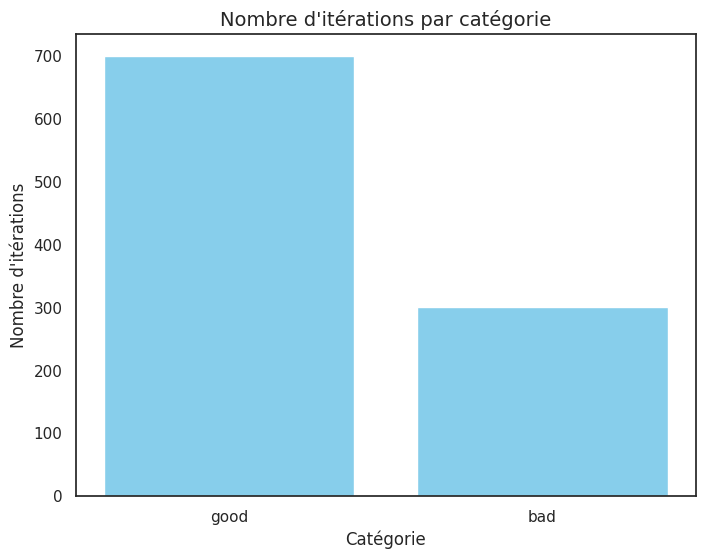

In [ ]:

# Calcul du nombre d'itérations (fréquence) par catégorie
risk_counts = df['Risk'].value_counts().reset_index()
risk_counts.columns = ['Category', 'Counts']

# Affichage des résultats
print("Nombre d'itérations par catégorie :")
print(risk_counts)

# Visualisation
plt.figure(figsize=(8, 6))
plt.bar(risk_counts['Category'], risk_counts['Counts'], color='skyblue')
plt.title('Nombre d\'itérations par catégorie', fontsize=14)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre d\'itérations', fontsize=12)
plt.show()


**Distribution:**

Bon Risque: 70%

Mauvais risque: 30%

In [ ]:
amount_risk = df.groupby(by='Risk', as_index=False).sum().loc[:, ['Risk', 'Credit amount']]
amount_risk['percentage'] = amount_risk['Credit amount'] / amount_risk['Credit amount'].sum()
amount_risk.style.background_gradient(cmap='Reds_r')

,Risk,Credit amount,percentage
0,bad,1181438,0.361157
1,good,2089820,0.638843


#### Données Numériques

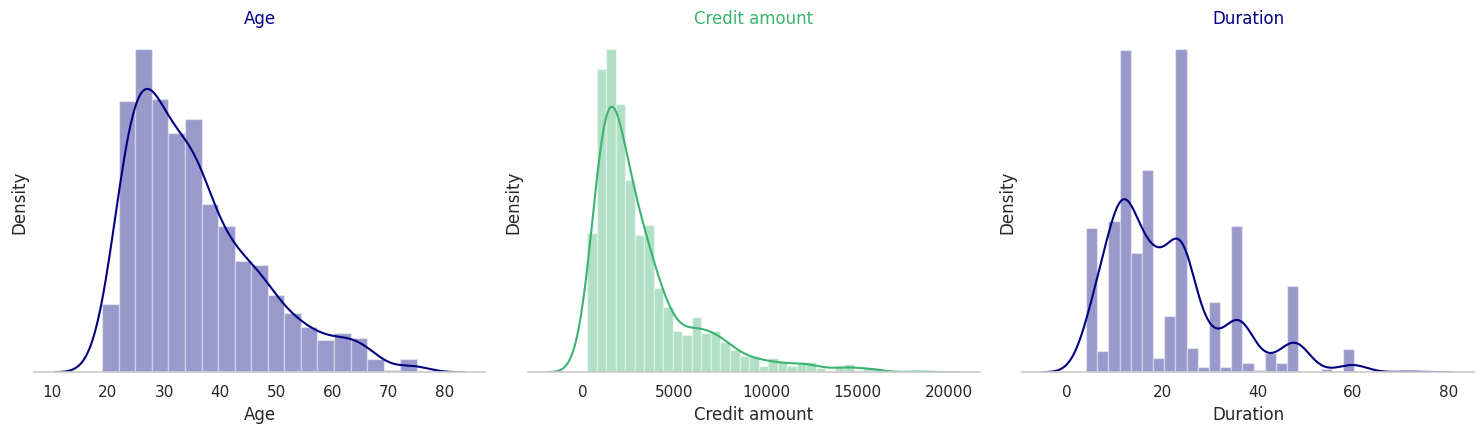

In [ ]:
num_cols = ['Age', 'Credit amount', 'Duration']
color_sequence = ['navy', 'mediumseagreen', 'navy']
numplot_analysis(df[num_cols], color_sequence=color_sequence, hist=True)
plt.show()

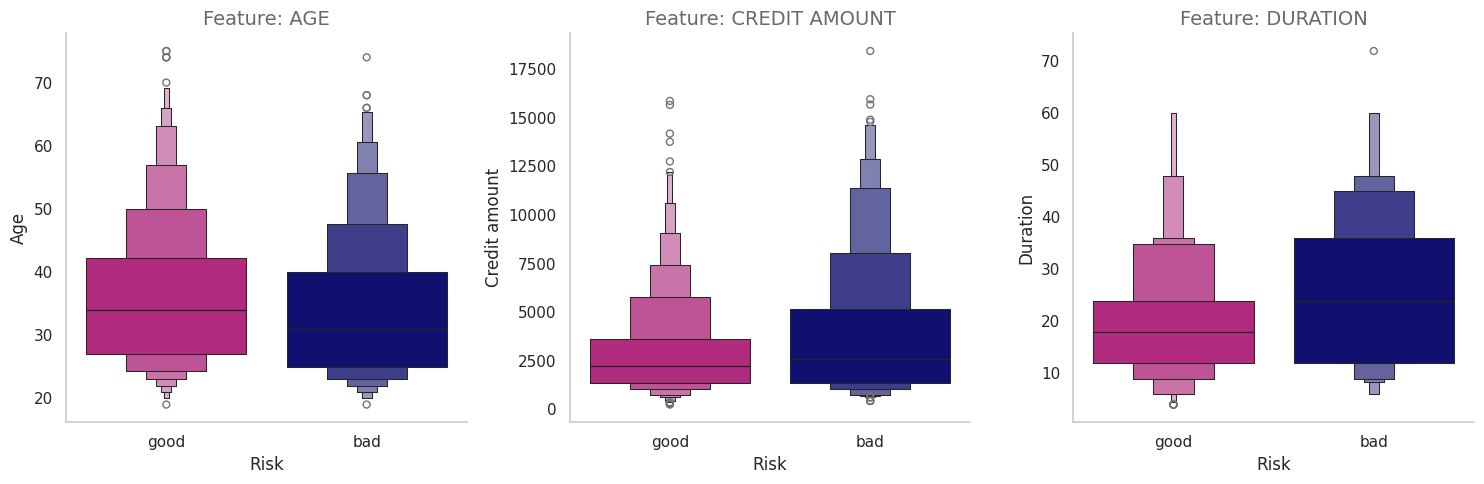

In [ ]:
color_list = ['mediumvioletred', 'navy']
boxenplot(df, features=['Age', 'Credit amount', 'Duration'], hue='Risk', fig_cols=3, figsize=(15, 5),
          palette=color_list)

#### Données Catégorielles

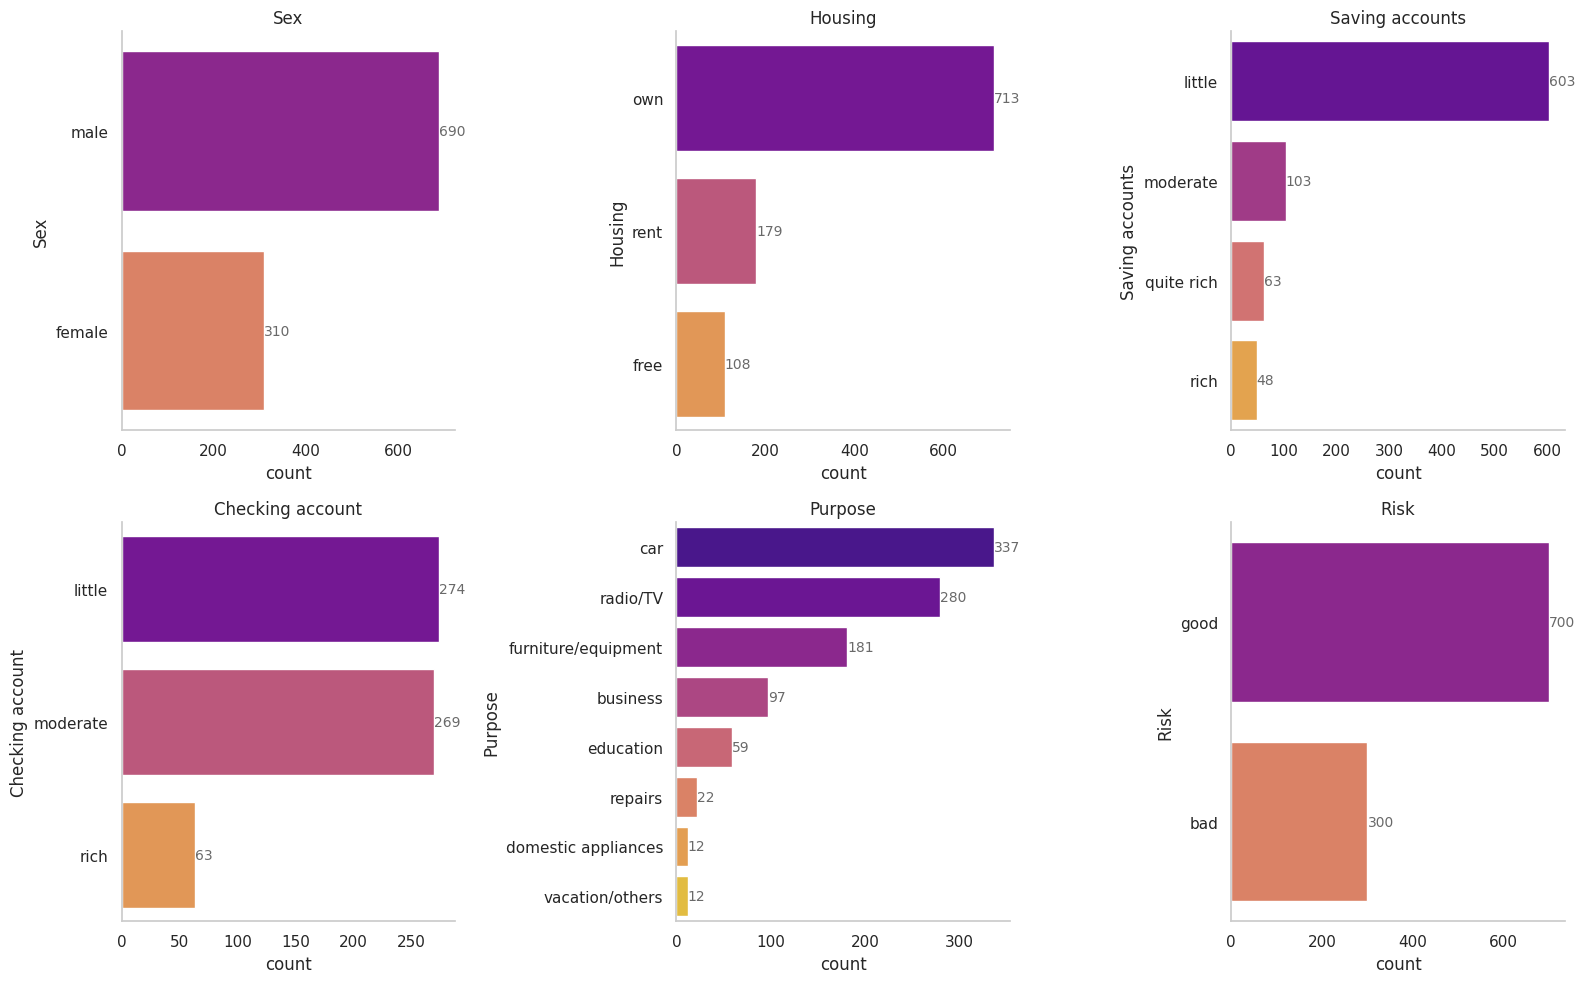

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = [col for col, dtype in df.dtypes.items() if dtype == 'object']
catplot_analysis(df[cat_features], palette='plasma')

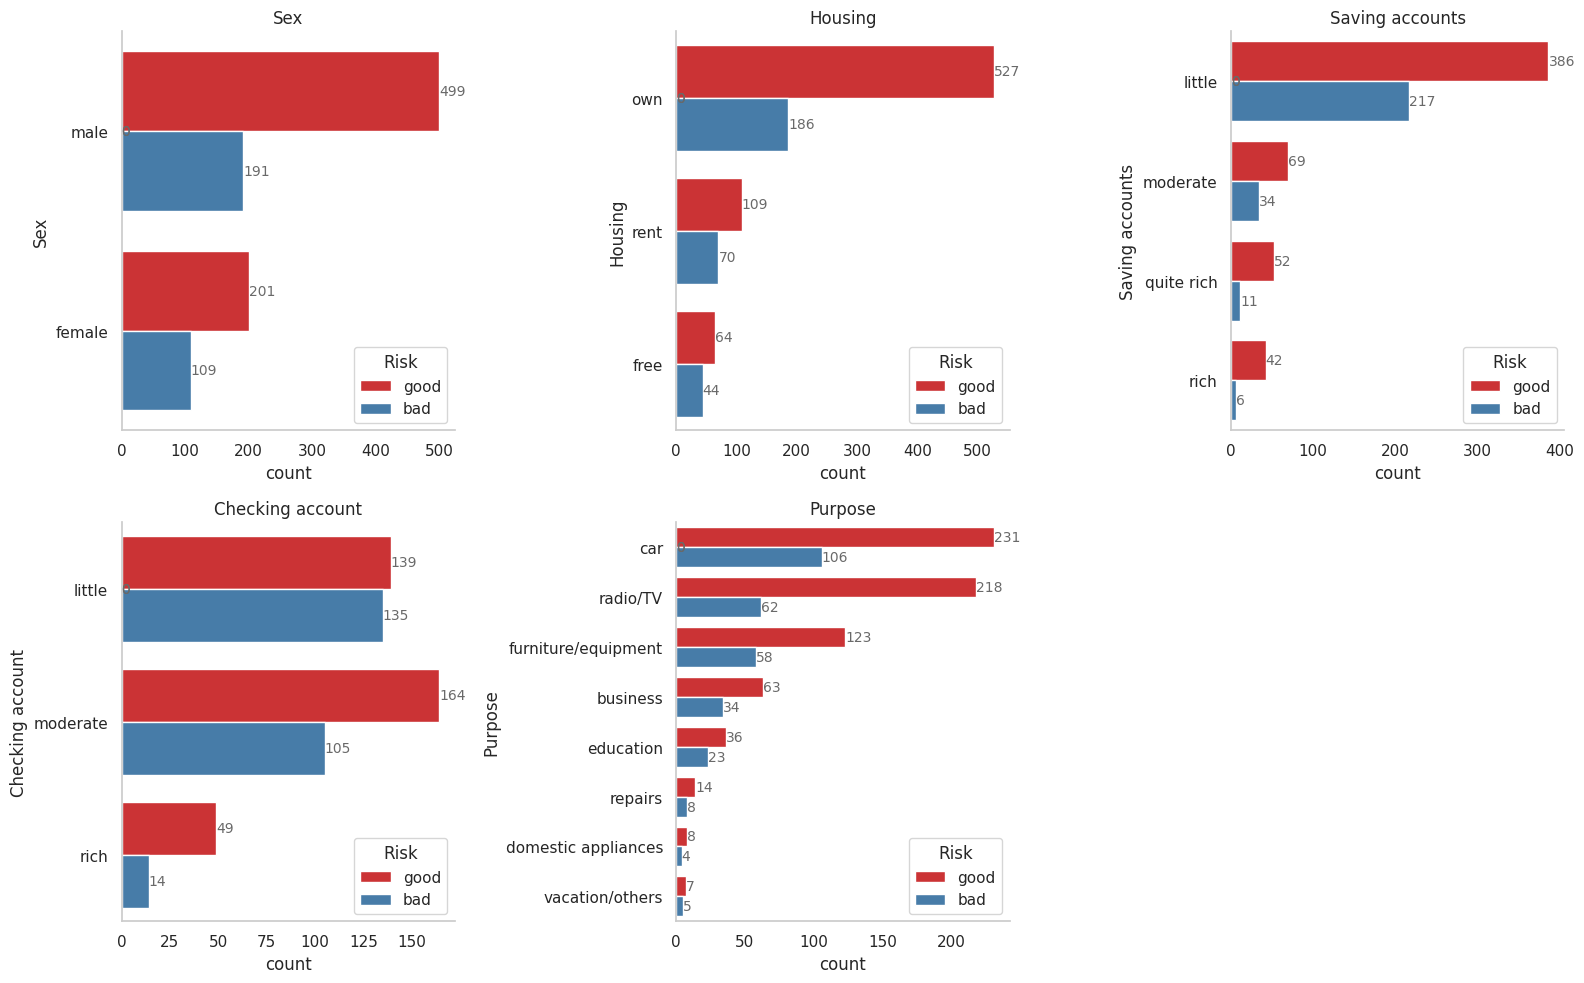

In [ ]:
catplot_analysis(df[cat_features], hue='Risk', palette='Set1')

# Prétraitement

#### Gestion des valeurs manquantes

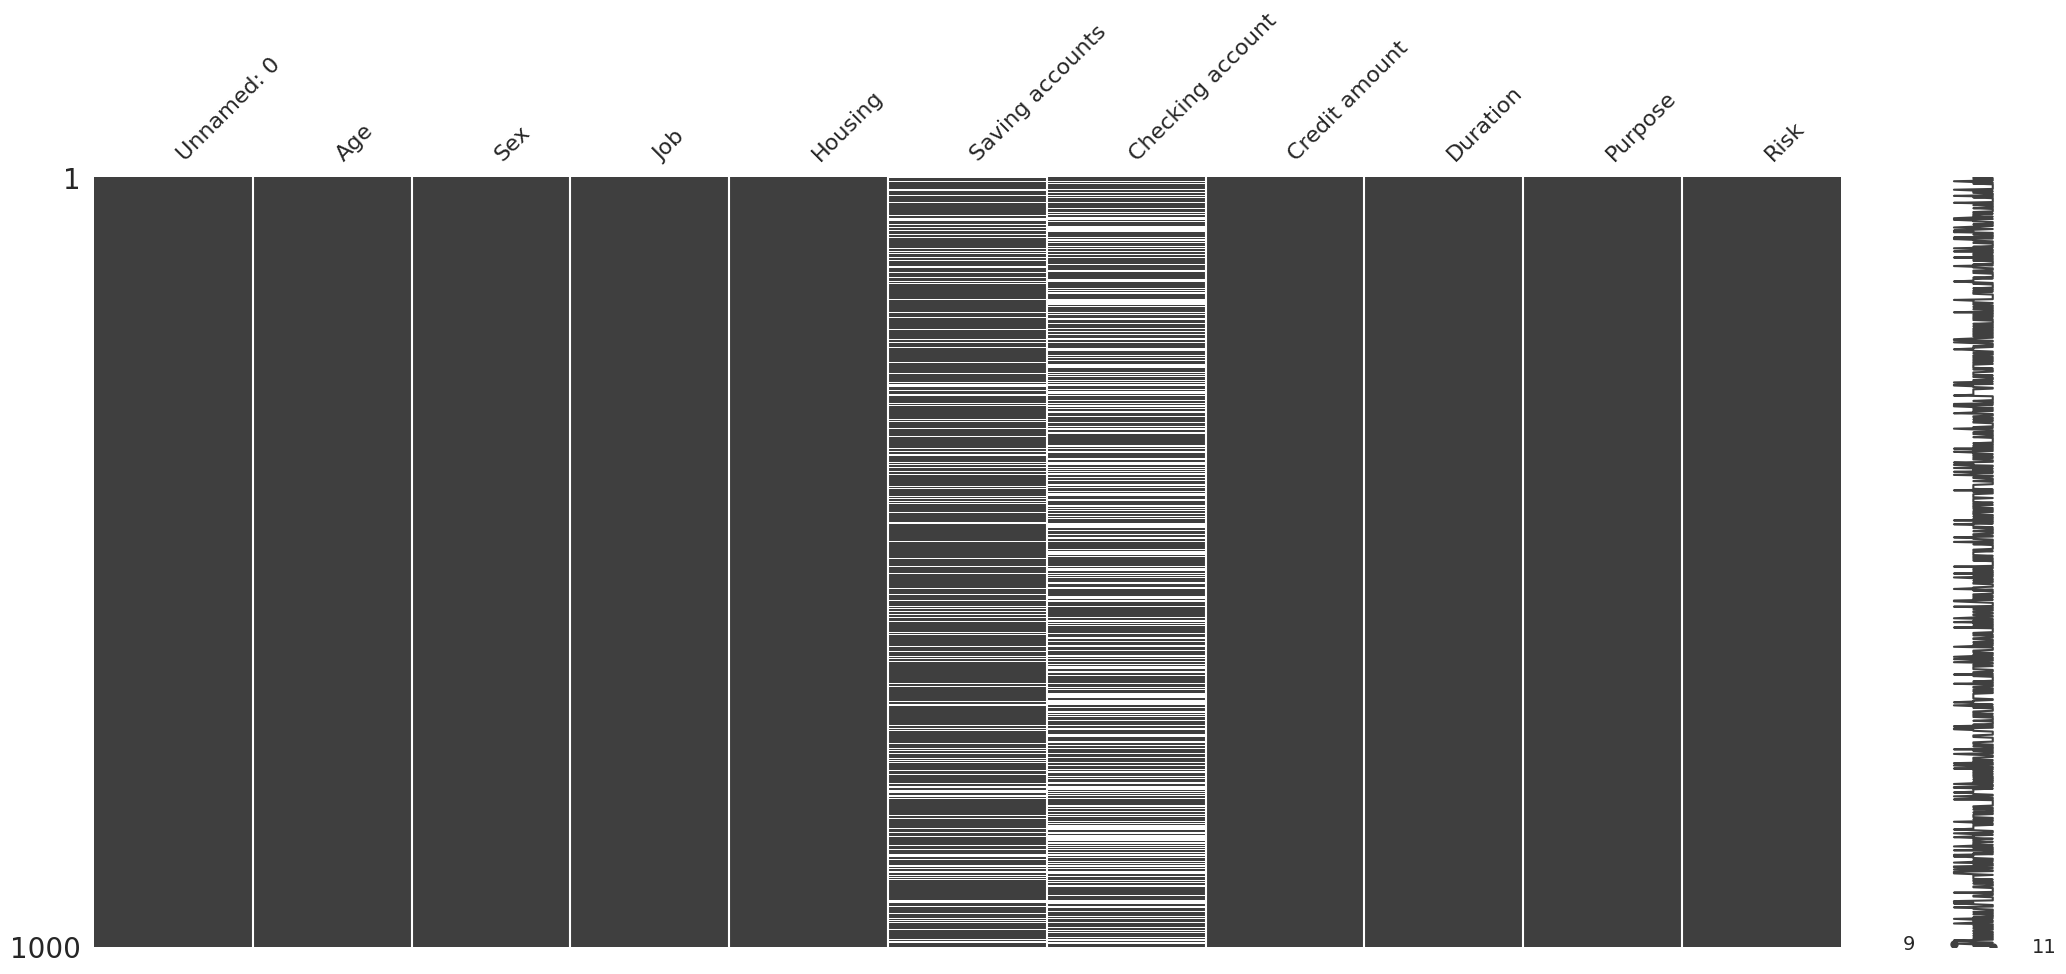

In [ ]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(df)
plt.show()

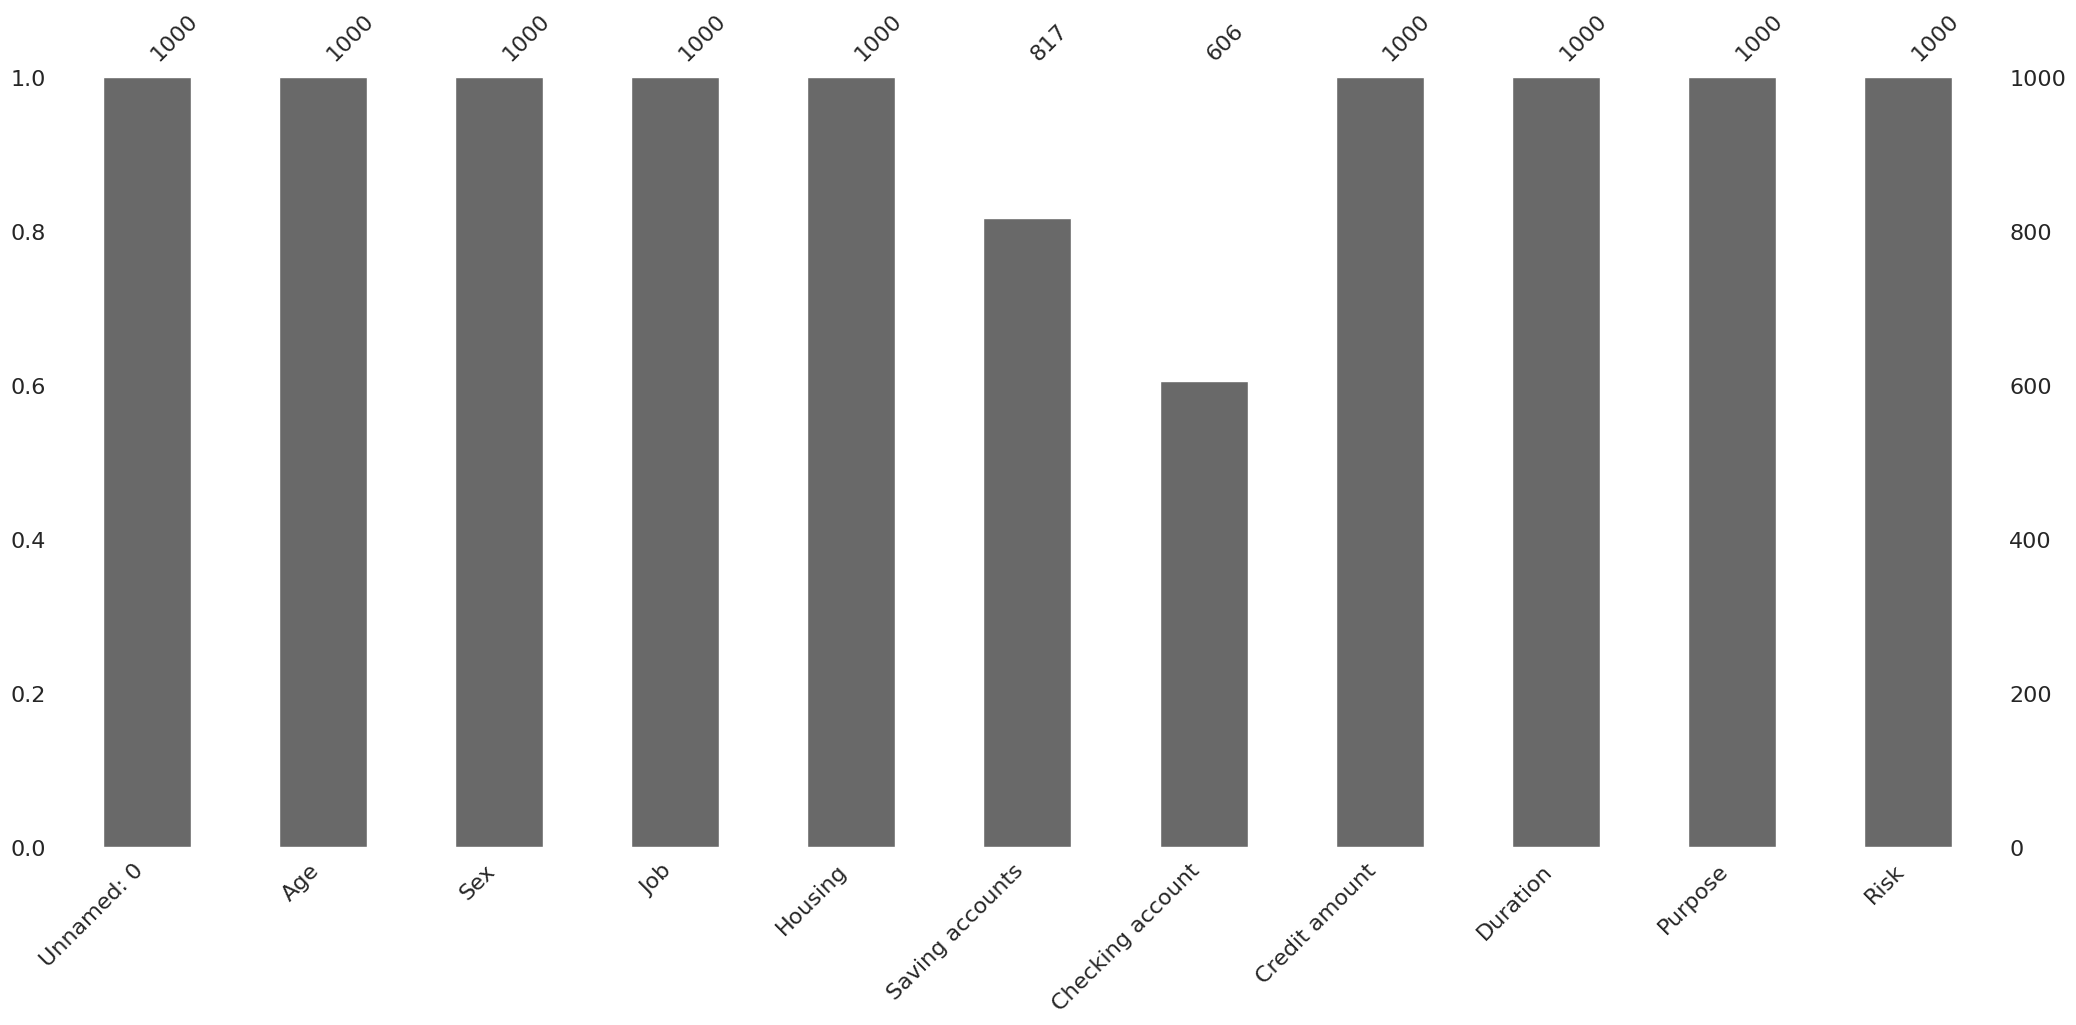

In [ ]:
msno.bar(df)
plt.show()


In [ ]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                  Missing Values  Percentage
Unnamed: 0                     0         0.0
Age                            0         0.0
Sex                            0         0.0
Job                            0         0.0
Housing                        0         0.0
Saving accounts              183        18.3
Checking account             394        39.4
Credit amount                  0         0.0
Duration                       0         0.0
Purpose                        0         0.0
Risk                           0         0.0


#### Iterative Imputer et encodage

In [ ]:
# Création d'une nouvelle variable
bins = [0, 25, 40, 60, 100]
labels = ['Jeune', 'Adulte', 'Mature', 'Senior']

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df=df.drop(columns=['Age'])

df=df.drop(columns=['Unnamed: 0'])

In [ ]:
categorical = ['Saving accounts','Sex','Housing','Checking account','Purpose','Risk','Age_group']
numerical = ['Credit amount','Duration','Job']


In [ ]:
df[categorical] = df[categorical].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))
print(df)

     Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0      1    2        1              NaN               0.0           1169   
1      0    2        1              0.0               1.0           5951   
2      1    1        1              0.0               NaN           2096   
3      1    2        0              0.0               0.0           7882   
4      1    2        0              0.0               0.0           4870   
..   ...  ...      ...              ...               ...            ...   
995    0    1        1              0.0               NaN           1736   
996    1    3        1              0.0               0.0           3857   
997    1    2        1              0.0               NaN            804   
998    1    2        0              0.0               0.0           1845   
999    1    2        1              1.0               1.0           4576   

     Duration  Purpose  Risk  Age_group  
0           6        5     1          3  
1  

In [ ]:
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

df[numerical] = imp_num.fit_transform(df[numerical])
df[categorical] = imp_cat.fit_transform(df[categorical])

print(df)

     Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0    1.0  2.0      1.0              0.0               0.0         1169.0   
1    0.0  2.0      1.0              0.0               1.0         5951.0   
2    1.0  1.0      1.0              0.0               0.0         2096.0   
3    1.0  2.0      0.0              0.0               0.0         7882.0   
4    1.0  2.0      0.0              0.0               0.0         4870.0   
..   ...  ...      ...              ...               ...            ...   
995  0.0  1.0      1.0              0.0               1.0         1736.0   
996  1.0  3.0      1.0              0.0               0.0         3857.0   
997  1.0  2.0      1.0              0.0               1.0          804.0   
998  1.0  2.0      0.0              0.0               0.0         1845.0   
999  1.0  2.0      1.0              1.0               1.0         4576.0   

     Duration  Purpose  Risk  Age_group  
0         6.0      5.0   1.0        3.0  
1  

In [ ]:
#Conversion en entier
df = df.apply(lambda x: x.astype(int, errors='ignore') if x.dtype == 'float' else x)

In [ ]:
df= df.drop_duplicates()

#### Matrice de correlation

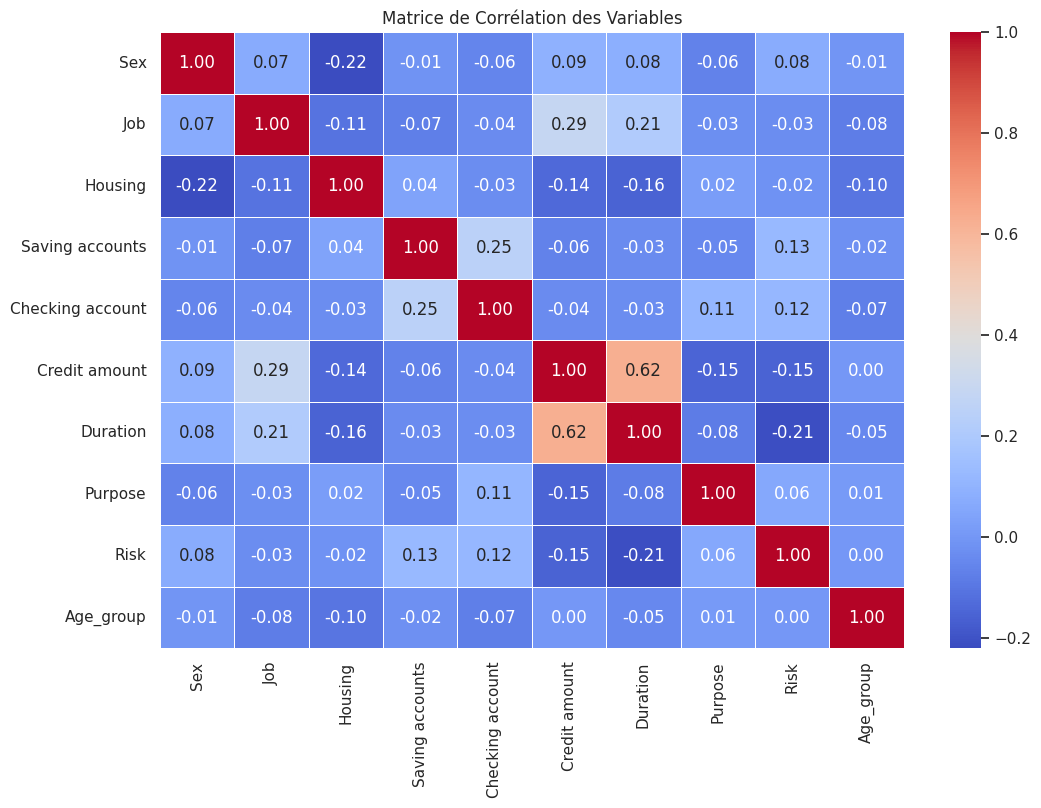

In [ ]:
# Analyser les corrélations entre les variables numériques
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()


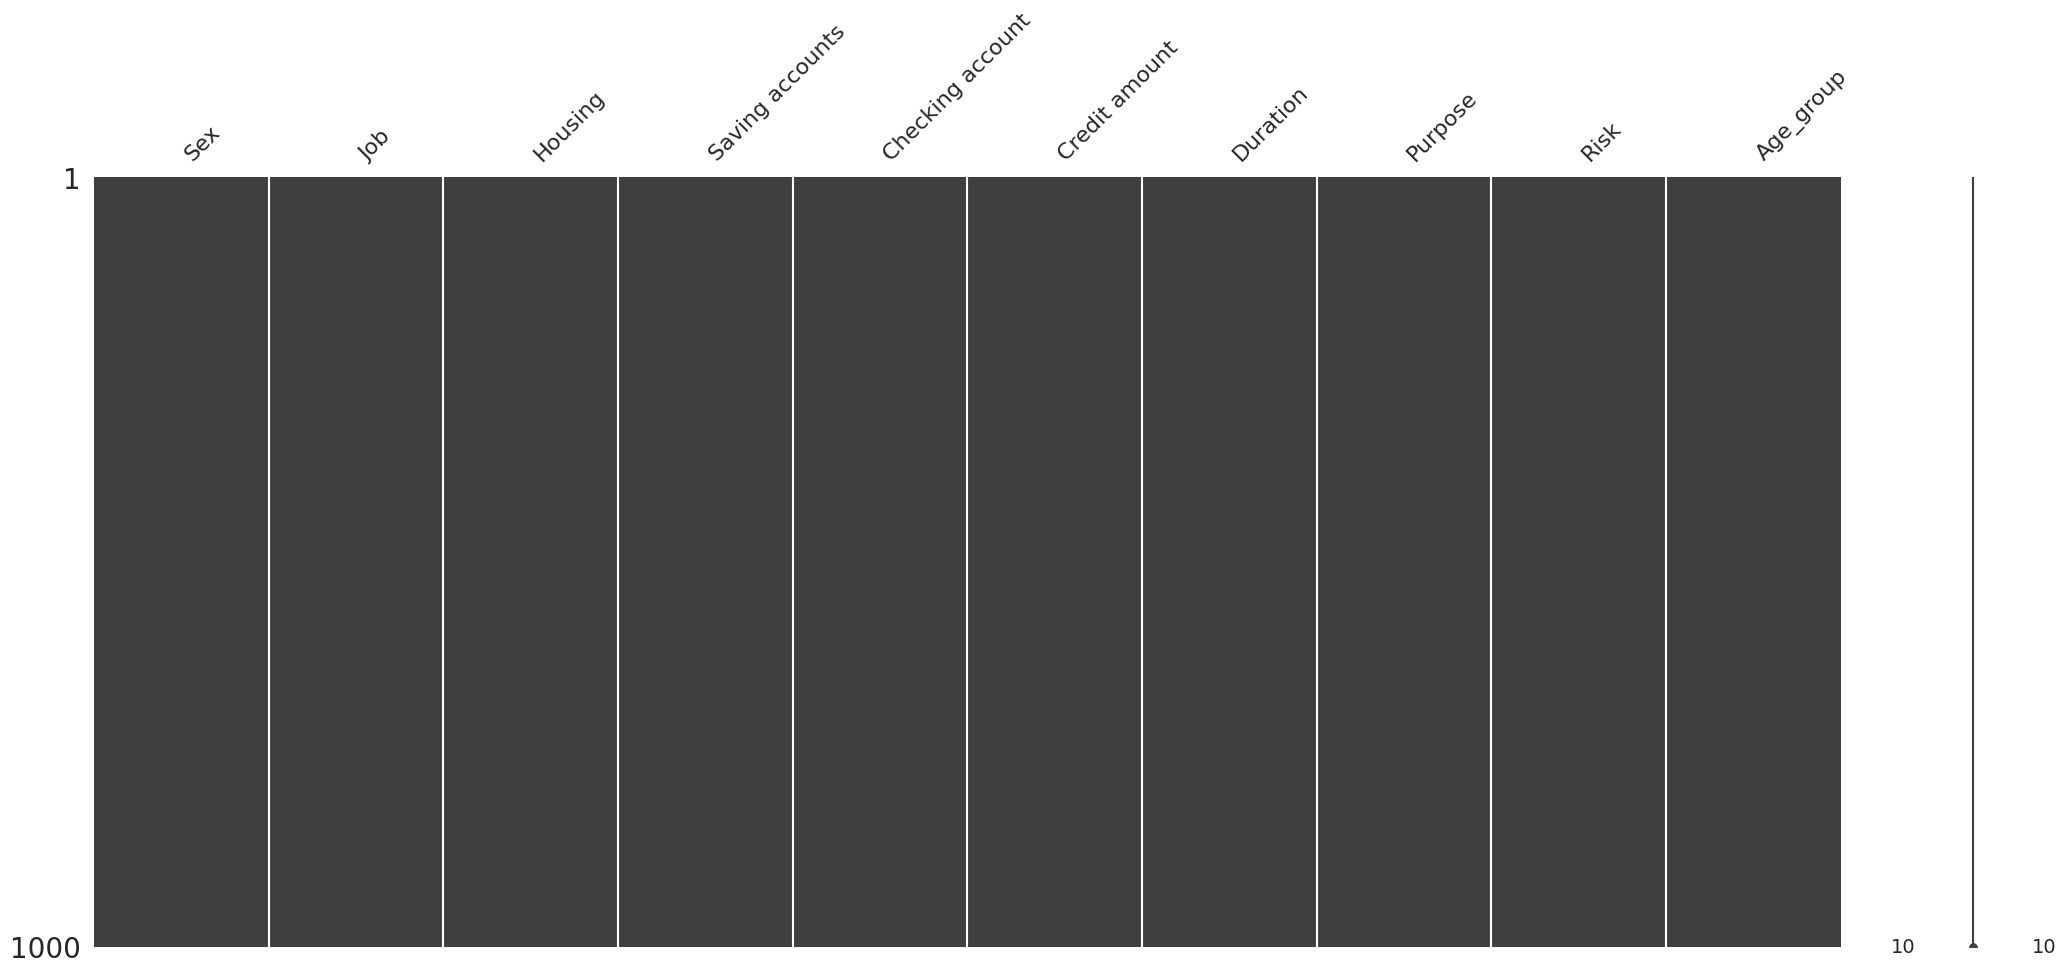

In [ ]:
#Vérification
msno.matrix(df)
plt.show()

In [ ]:
# Séparation des features (X) et de la cible (y)
X = df.drop("Risk", axis=1)
y = df["Risk"]


#### OverSampling

In [ ]:
# Gestion du déséquilibre des classes avec SMOTE (sur-échantillonnage)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
X_resampled

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_group
0,1,2,1,0,0,1169,6,5,3
1,0,2,1,0,1,5951,48,5,1
2,1,1,1,0,0,2096,12,3,2
3,1,2,0,0,0,7882,42,4,2
4,1,2,0,0,0,4870,24,1,2
...,...,...,...,...,...,...,...,...,...
1395,0,1,0,0,1,2673,35,4,1
1396,0,2,0,0,1,12579,24,1,2
1397,0,2,1,0,0,3169,19,3,0
1398,0,2,2,0,0,1275,14,1,1


# Entrainement

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Calcul des poids de classe pour Random Forest
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(zip(np.unique(y_resampled), class_weights))


###Random Forest

#### Sans Grid Search

In [ ]:

# Modèle de Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)


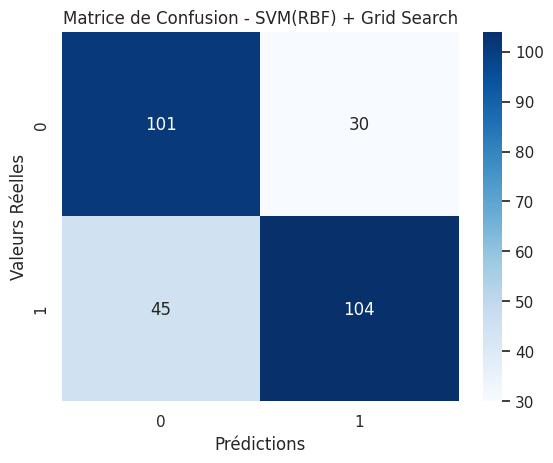

Accuracy: 0.7321428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       131
           1       0.78      0.70      0.73       149

    accuracy                           0.73       280
   macro avg       0.73      0.73      0.73       280
weighted avg       0.74      0.73      0.73       280



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entraînement du modèle
rf_model= RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(RBF) + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

#### Avec Grid Search

In [ ]:
# Grid Search pour hyperparamètres
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [3, 5, 10, 20, 50],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [ ]:
# Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés par Grid Search:", grid_search.best_params_)


Meilleurs paramètres trouvés par Grid Search: {'bootstrap': True, 'class_weight': None, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


In [ ]:
# Modèle avec les meilleurs paramètres
best_model_rf = grid_search.best_estimator_

In [ ]:
# Prédictions
y_pred = best_model_rf.predict(X_test)
y_prob = best_model_rf.predict_proba(X_test)[:, 1]

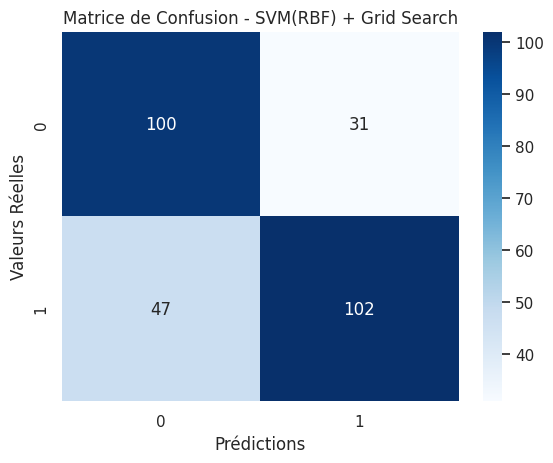

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       131
           1       0.77      0.68      0.72       149

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.72       280
weighted avg       0.73      0.72      0.72       280


ROC-AUC Score: 0.81


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# Évaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(RBF) + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

### Logistic Regression

#### Sans Grid Search

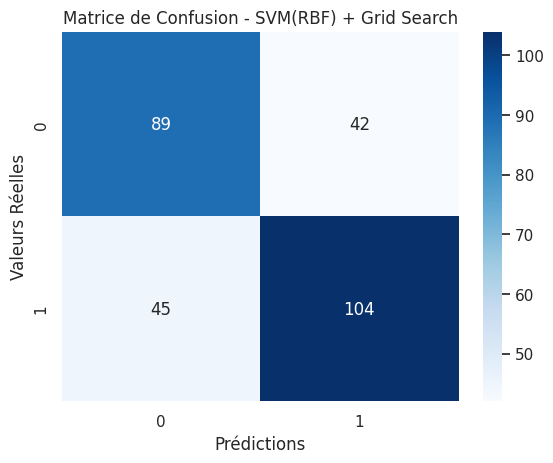

Accuracy: 0.6892857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       131
           1       0.71      0.70      0.71       149

    accuracy                           0.69       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.69      0.69      0.69       280



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialisation du modèle
model_lr = LogisticRegression()

# Entraînement du modèle
model_lr.fit(X_train, y_train)

# Prédiction
y_pred = model_lr.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(RBF) + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


#### Avec Grid Search

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'solver': ['liblinear', 'lbfgs'],  # Méthodes d'optimisation
    'max_iter': [100, 200, 300]  # Nombre d'itérations maximales
}

In [ ]:
# Initialisation du modèle de régression logistique
log_reg = LogisticRegression()

# Initialisation de GridSearchCV avec la régression logistique et la grille de paramètres
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
# Entraîner le modèle avec la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

Best Parameters: {'C': 0.1, 'max_iter': 300, 'solver': 'lbfgs'}


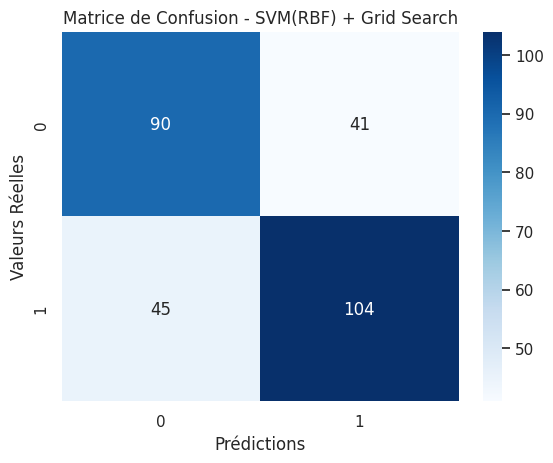

Accuracy: 0.6928571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       131
           1       0.72      0.70      0.71       149

    accuracy                           0.69       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.69      0.69      0.69       280



In [ ]:
# Afficher les meilleurs paramètres
print("Best Parameters:", grid_search.best_params_)

# Meilleur modèle avec les paramètres optimaux
best_model_rl = grid_search.best_estimator_

# Prédiction avec le meilleur modèle
y_pred = best_model_rl.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(RBF) + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


### XGBoost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_test,y_pred))

Accuracy: 
0.7571428571428571


### SVM

#### Sans Grid Search

In [ ]:
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
sv.score(X_test,y_test)

0.5714285714285714

# Choix du modèle

**Choix du modèle**:
Après évaluation, Le modèle présentant de bon résultats au niveaus des metriques est le *RandomForestClassifier*, après utilisation du Grid search pour la recherce des hyperparamètres.

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyennes et écarts-types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label="Training", color='blue', marker='o')
plt.plot(train_sizes, val_scores_mean, label="Cross Validation", color='green', marker='o')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 color='green', alpha=0.2)

# Ajout des détails
plt.title("Learning Curve - Random Forest", fontsize=16)
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Sauvegarde du modèle

In [ ]:
import joblib
# Sauvegarde du modèle avec joblib
joblib.dump(best_model_rf, 'credit_risk_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Prediction et Export du dataset avec prédiction

In [ ]:
# Prédictions sur l'ensemble de données
pred = best_model_rf.predict(X_test)

df_results = pd.DataFrame(X_test)
df_results.head()

In [ ]:
df_results['predictions'] = pred

In [ ]:
df_results.to_csv('predictions_results.csv', index=False)